# ✅ Proyecto: Clasificador lineal con descenso del gradiente desde cero

Objetivo: Implementar un modelo de regresión logística binaria usando solo NumPy, aplicando:

    Álgebra lineal → producto punto, operaciones matriciales

    Estadística → normalización, probabilidad

    Cálculo → derivadas, gradiente, optimización

    Función sigmoide y coste log-loss

    Visualización de decisión

In [2]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


In [3]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## 1. 🔢 Generar datos y visualizar

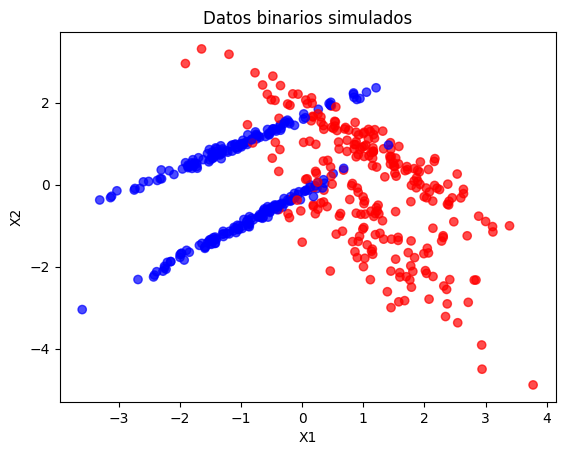

In [4]:
# Datos sintéticos binarios
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, random_state=42)

# Visualizar
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Datos binarios simulados")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## 2. ⚙️ Preparar datos

In [5]:
# Normalización (estadística básica)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Agregar columna de bias (1)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. 🧠 Modelo de regresión logística desde cero

In [6]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de coste (log loss)
def loss(y, y_pred):
    m = y.shape[0]
    return -(1/m) * np.sum(y*np.log(y_pred + 1e-15) + (1 - y)*np.log(1 - y_pred + 1e-15))

# Gradiente descendente
def entrenar(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    losses = []

    for i in range(epochs):
        z = np.dot(X, w)               # Álgebra lineal
        y_pred = sigmoid(z)            # Probabilidad (estadística)
        grad = np.dot(X.T, (y_pred - y)) / m  # Derivadas parciales
        w -= lr * grad                 # Paso del gradiente
        l = loss(y, y_pred)
        losses.append(l)
        
        if i % 100 == 0:
            print(f"Iteración {i}: pérdida = {l:.4f}")
    
    return w, losses

## 4. 🧪 Entrenar el modelo

In [7]:
w, losses = entrenar(X_train, y_train, lr=0.1, epochs=1000)

Iteración 0: pérdida = 0.6931
Iteración 100: pérdida = 0.3421
Iteración 200: pérdida = 0.3046
Iteración 300: pérdida = 0.2923
Iteración 400: pérdida = 0.2868
Iteración 500: pérdida = 0.2840
Iteración 600: pérdida = 0.2824
Iteración 700: pérdida = 0.2815
Iteración 800: pérdida = 0.2809
Iteración 900: pérdida = 0.2806


## 5. 📈 Visualizar la función de pérdida

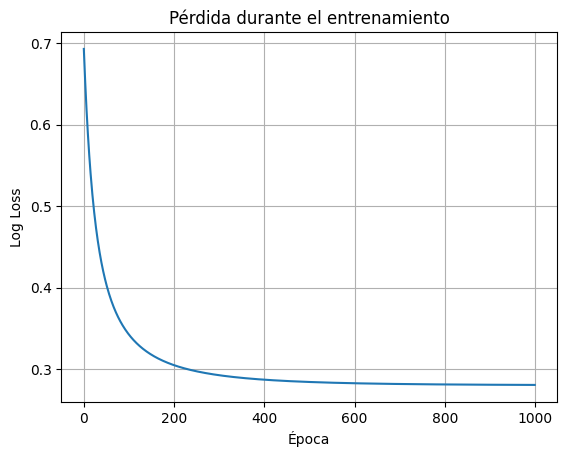

In [8]:
plt.plot(losses)
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()

## 6. ✅ Evaluación

In [9]:
def predecir(X, w, threshold=0.5):
    return (sigmoid(np.dot(X, w)) >= threshold).astype(int)

y_pred = predecir(X_test, w)

# Métricas manuales
acc = np.mean(y_pred == y_test)
print(f"Precisión en test: {acc:.4f}")

Precisión en test: 0.8733


## 7. 🧭 Visualizar la frontera de decisión (2D)

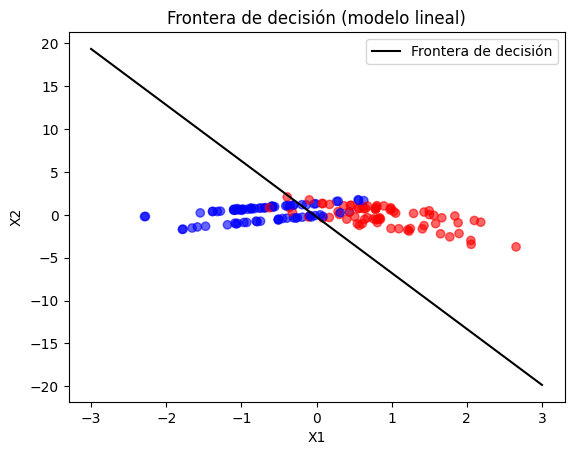

In [10]:
# Solo válido para 2 características
x1 = np.linspace(-3, 3, 100)
x2 = -(w[0] + w[1]*x1)/w[2]

plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap='bwr', alpha=0.6)
plt.plot(x1, x2, label="Frontera de decisión", color="black")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Frontera de decisión (modelo lineal)")
plt.legend()
plt.show()

## 📌 ¿Qué matemáticas aplicamos?

| Concepto Matemático        | Aplicación en el Código                                 |
|----------------------------|----------------------------------------------------------|
| **Álgebra lineal**         | Producto punto (`np.dot`), operaciones matriciales      |
| **Probabilidad**           | Función sigmoide para modelar probabilidades            |
| **Estadística**            | Normalización de datos, cálculo de log-loss             |
| **Cálculo diferencial**    | Derivadas parciales para calcular el gradiente          |
| **Optimización**           | Descenso del gradiente para minimizar la pérdida        |